<div style='text-align: center;'>
<img src="images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Class - Week 8

## Department of Mathematics


We now introduce the final numerical scheme which is related to the PDE solution.
Finite difference methods are numerical solutions to (in CF,
generally) parabolic PDEs. They work by approximating the derivatives at each 
point in time and then  rearranging the equations to solve backward in time.
  There are three types of methods - the explicit method, which is 
analogous to the trinomial tree, the implicit method (which 
you would never use!) and the Crank-Nicolson method which has the best convergence characteristics. 

Now the PDE we wish to solve is the  Black-Scholes equation (BSM model) where there are continuous 
dividends:
$$\frac{\partial V}{\partial t}+\frac12\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}+(r-\delta)S \frac{\partial V}{\partial S}
-rV=0$$

## Finite-Difference Approximations

Consider a function of two variables $V(S,t)$, if we consider small 
changes in $S$ and $t$ we can use a Taylor's series to express $V(S+ \Delta S, t)$, $V(S - \Delta S, t)$, $V(S, t +\Delta  t)$ as follows (all the derivatives are evaluated at $(S,t)$)
$$
V(S+\Delta S,t)=V(S,t)+\Delta S \frac{\partial V}{\partial S}
+\tfrac12 (\Delta S)^2\frac{\partial ^2 V}{\partial S^2}
+O((\Delta S)^3) \tag{1}
$$
$$
 V(S-\Delta S,t)=V(S,t)-\Delta S \frac{\partial V}{\partial S}
+\tfrac12 (\Delta S)^2\frac{\partial ^2 V}{\partial S^2}
+O((\Delta S)^3) \tag{2}
$$
$$
V(S,t+\Delta t)=V(S,t)+\Delta t\frac{\partial V}{\partial t}
+\tfrac12 (\Delta t)^2\frac{\partial ^2V}{\partial t^2} +O((\Delta t)^2) 
\tag{3}
$$
In order to use a finite difference scheme we need to use these expansions to approximate the first and second derivatives with 
respect to $S$ and $t$.  




# Task

- Use point estimates of the value function $V$ to derive approximations of $\frac{\partial V}{\partial S}$ and  $\frac{\partial^2 V}{\partial S^2}$.

# Solution

For $S$, we have two options for the first derivative:
- From (1) &mdash; so called forward difference:
$$
\frac{\partial V}{\partial S}(S,t)=\frac{V(S+\Delta S,t)-V(S,t)}{\Delta S}
+\frac12 \Delta S \frac{\partial^2 V}{\partial S^2}
+O((\Delta S)^2)
$$
$$=\frac{V(S+\Delta S,t)-V(S,t)}{\Delta S}
+O(\Delta S)
$$
- Take (1) minus (2) to get central difference approximation:
$$\frac{\partial V}{\partial S}(S,t)=\frac{V(S+\Delta S,t)-V(S-\Delta S,t)}{2\Delta S}+O((\Delta S)^2)$$

For the second derivative we add (1) plus (2) to get:
$$\frac{\partial^2 V}{\partial S^2}(S,t)=\frac{V(S+\Delta S,t)-2V(S,t)
+V(S-\Delta S,t)}{(\Delta S)^2}+O((\Delta S)^2)$$

For derivative in $t$, use (3) and we have
$$
\frac{\partial V}{\partial t}(S,t)=\frac{V(S,t+\Delta t)-V(S,t)}{\Delta t}
+\frac12\Delta t \frac{\partial^2V}{\partial t^2}+O((\Delta t)^2)\nonumber\\
$$
$$=\frac{V(S,t+\Delta t)-V(S,t)}{\Delta t}+O(\Delta t)\nonumber
$$
In general central differencing (when appropriate) is the most accurate.

## How does this help us?

  Reconsider the Black-Scholes equation and in particular the Black-Scholes equation for a European options where there are continuous 
dividends:
$$\frac{\partial V}{\partial t}+\frac12\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}+(r-\delta)S \frac{\partial V}{\partial S}
-rV=0 \tag{4}$$
By substuting the finite difference formula into (4), we can find an equation for $V(S,t)$ in terms of $V(S+\Delta S,t+\Delta t)$, $V(S,t+\Delta t)$ and $V(S-\Delta S,t+\Delta t)$.

## Domain and Boundary conditions

To get a solution, we must satisfy (4) at all interior points in the domain 
$$
0<S<\infty, \quad \quad t<T,
$$
and specify the value at the boundaries:
$$
S=0, \quad \quad S\to\infty, \quad \mbox{and} \quad t=T.
$$
Given finite storage space and computation time, we must approximate the semi infinite domain with a suitably large finite value of $S$.

The boundary conditions are:  
- For a call:
| Boundary | Condition |
|---|---|
|$t = T$ | $V(S,T) = \max(S - X, 0)$ |
|$S = 0$ | $V(0,T) = 0$ |
|$S \to \infty$ | $V(S, t) \to Se^{-\delta(T-t)} - Xe^{-r(T-t)}$

- for a put:
| Boundary | Condition |
|---|---|
|$t = T$ | $V(S,T) = \max(X - S, 0)$ |
|$S = 0$ | $V(0, t) = Xe^{-r(T-t)}$ |
|$S \to \infty$ | $V(S, t) \to  0$


## Constructing the Finite Difference Grid

We now need  to ensure that we have a fine enough grid to allow for most possible movements in $S$ and 
enough time steps $t$.
 As for the binomial and Monte-Carlo method we will discuss later what is a suitable size/number for these steps.
  We partition the interval $[0, S_u]$ into $jmax$ subintervals each of 
length $\Delta S = S_u/jmax$, thus the endpoints of the intervals (or grid 
nodes) are 0, $\Delta S$, $2\Delta S$,..., $(jmax - 1)\Delta S$, $jmax\Delta S = S_u$. So we may write
$$
S_j = j \Delta S.
$$
  We also partition the interval $[0, T]$ into $imax$ subintervals each of length $\Delta t = T/imax$, thus the nodes on the grid are 0, $\Delta t$,..., $(imax - 1)\Delta t$, $imax \Delta t = T$. So we may write
  $$
t^i = i \Delta t.
$$

  We will denote the option price at each node $V(j\Delta S, i\Delta t)$ as $V_j^i$. In code, we will use `vNew[j]` as an array corresponding to the value of the option we are solving for $V_j^i$, and `vOld[j]` an array corresponding to the value of the option $V_j^{i+1}$ we solved at the previous timestep (remember we solve backwards in time).

# Tasks

Consider the simple example of a European Put option, with the following parameters: $\sigma=0.4$, $r=0.05$, $X=2$, $T=1$. 

- Trying sketching out the grid.
- Consider a small example with `imax=jmax=4`, setup storage arrays for the grid and plot out the value of the option at expiry and the boundary conditions.

In [1]:
# To get started, import some things we'll need
import numpy as np
import matplotlib.pyplot as plt

from math import exp, sqrt, log
from scipy.stats import norm

In [2]:
# setup the parameters
sigma = 0.4 # volatility
r = 0.05 # risk-free return
delta = 0.0 # continuous dividend rate
X = 2 # strike price
T = 1 # expiration

imax = 4 # Number of steps in the time grid
jmax = 4 # Number of steps in the S grid
SuFactor = 2 # S_u = SuFactor * X

In [3]:
## Calculate the step sizes
dS = (SuFactor*X) / jmax
dt = T / imax

# The grid values in S and t
S = np.array( [j*dS for j in range(jmax+1)] )
t = np.array( [i*dt for i in range(imax+1)] )

# Allocate storage for our approximate values of V(S,t): 
# vOld will hold values of V^{i+1}_j, while vNew will 
# receive values of V^{i}_j
vNew = np.zeros(jmax+1)
vOld = np.zeros(jmax+1)


# Finite Difference Approach

Therefore the finite difference approach will proceed as follows:
1. Substitute appropriate finite difference formulas into the PDE;
2. Rearrange to derive a single (linear) equation including $V^i_j$ at each point $i,j$ on the interior of the grid;
3. Apply any boundary conditions as appropriate.
4. Solve the equation (or system of equations) at each and every point  on the interior of  the grid, taking care to update the values required for other equations first.

# Explicit Finite Difference Method

Substituing our finite difference approximations into (4), the BSM equation approximates to
$$\frac{V_j^{i+1}-V_j^i}{\Delta t}+
\tfrac12\sigma^2j^2(\Delta S)^2\frac{V_{j+1}^{i+1}-2V_j^{i+1}-V_{j-1}^{i+1}}{(\Delta S)^2}
+(r-\delta)j\Delta S\frac{V_{j+1}^{i+1}
-V_{j-1}^{i+1}}{2\Delta S}-r V_j^i=0,$$
note that the unknown here is $V_j^i$ as we will be solving backwards in time. So we can rearrange in terms of this unknown:
$$
V_j^i=\frac{1}{1+r\Delta t}(A V_{j+1}^{i+1}+B V_j^{i+1}+C V_{j-1}^{i+1})
\tag{5}
$$
where:
$$A=(\tfrac12\sigma^2 j^2+\tfrac12(r-\delta)j)\Delta t$$
$$B=1-\sigma^2j^2\Delta t$$
$$C=(\tfrac12\sigma^2j^2-\tfrac12(r-\delta)j)\Delta t$$

 Thus, just as with a binomial tree, we have a way of calculating
the option value at expiry &mdash; the known payoff  &mdash; and we have 
a scheme for calculating the option value for all values of
$S$ at the previous time step.
Thus we can  use the backward scheme and equation (5) for $V_i^j$
to calculate the option value all the way back to $t = 0$.

  The differences between the binomial and explicit finite
difference method are
- the binomial uses two nodes to the explicit finite difference's
three.
- You get to choose the specifications of the grid in the finite
difference method
- You also need to specify the behaviour on the upper and
lower $S$ boundaries.


# Finite Difference Approximations on the Boundary Conditions

If we attempt to use (5) to calculate $V_0^i$ then we need
to have values of $V_{-1}^i$ which we don't have (this falls outside the grid).
 So for $V_0^i$ and $V_{jmax}^i$ we need to use our boundary conditions. 
In order to be used, they will normally need to be **discretised**.

First consider the payoff at expiry $t=T$, we have $V(S,T)= \max(X-S,0)$ so this can be written
$$
V_j^{imax} = \max(X - S_j , 0).
$$

For put option, at $S=0$, we have $V(S=0,t)= X e^{-r(T-t)}$ so in discrete terms this changes to
$$
V_0^i = X e^{-r(T-i\Delta t)}
$$
and as $S\to\infty$ we have $V\to 0$. This can be either
$$
V_{jmax}^i = 0
$$
or using a weaker condition, we may say $\frac{dV}{dS}\to 0$, which can discretised to
$$
\frac{V_{jmax}^i-V_{jmax-1}^i}{\Delta S} = 0.
$$
This second condition may provide better results at lower values of $S_u$, which could make it more efficient.

Tasks:
    
- Code up the finite difference method and print out the values on screen.
- Try different values of `imax` and `jmax` -- what do you notice?
- Put your algorithm in a function, and return the solution:
    - Parameters: `sigma`, `r`, `X`, `T`, `imax`, `jmax`
    - return: `vNew`, `S`
- Try plotting the solution $V(S,t=0)$ against $S$ for different values of $imax$ and $jmax$

In [4]:
# The boundary condition at t=T is the value of the option at expiry
for j in range(jmax+1):
    vOld[j] = max( X - S[j], 0.0 )
    print("t=",t[imax],"S=",S[j],"V(S,t)=",vOld[j])

t= 1.0 S= 0.0 V(S,t)= 2.0
t= 1.0 S= 1.0 V(S,t)= 1.0
t= 1.0 S= 2.0 V(S,t)= 0.0
t= 1.0 S= 3.0 V(S,t)= 0.0
t= 1.0 S= 4.0 V(S,t)= 0.0


In [5]:
# Work backward through time
discountRatio = 1.0 /(1.0 + r*dt)
for i in range(imax-1,-1,-1): # Counts down from iMax-1 to 0 in steps of -1
    # apply boundary condition at S=0
    vNew[0] = X * exp( -r*(T - t[i]) )
    for j in range(1,jmax):
        jSqSigmaSqDt = j*j*sigma*sigma*dt
        rMinusDeltaJdt = (r - delta)*j*dt
        A = 0.5*(jSqSigmaSqDt + rMinusDeltaJdt)
        B = 1.0 - jSqSigmaSqDt
        C = 0.5*(jSqSigmaSqDt - rMinusDeltaJdt)
        vNew[j] = discountRatio * (A*vOld[j+1] + B*vOld[j] + C*vOld[j-1])
        
    # Apply boundary condition at S=S_u
    vNew[jmax] = vNew[jmax-1] # Coud also use vNew[jmax] = 0.0
    
    # Prepare for the next step by copying vNew into vOld
    # MAKE SURE THIS IS A DEEP COPY!
    # using following syntax to create a new array to put copy in should work
    vOld = np.copy(vNew)
    
    for j in range(jmax+1):
        print("t=",t[i],"S=",S[j],"V(S,t)=",vNew[j])

vNewOrig = vNew.copy()

t= 0.75 S= 0.0 V(S,t)= 1.9751556009877629
t= 0.75 S= 1.0 V(S,t)= 0.9753086419753086
t= 0.75 S= 2.0 V(S,t)= 0.0666666666666667
t= 0.75 S= 3.0 V(S,t)= 0.0
t= 0.75 S= 4.0 V(S,t)= 0.0
t= 0.5 S= 0.0 V(S,t)= 1.9506198240566652
t= 0.5 S= 1.0 V(S,t)= 0.9532885785776574
t= 0.5 S= 2.0 V(S,t)= 0.12032921810699593
t= 0.5 S= 3.0 V(S,t)= 0.01061728395061729
t= 0.5 S= 4.0 V(S,t)= 0.01061728395061729
t= 0.25 S= 0.0 V(S,t)= 1.9263888354416436
t= 0.25 S= 1.0 V(S,t)= 0.9334683456697669
t= 0.25 S= 2.0 V(S,t)= 0.16435123064622278
t= 0.25 S= 3.0 V(S,t)= 0.027958847736625526
t= 0.25 S= 4.0 V(S,t)= 0.027958847736625526
t= 0.0 S= 0.0 V(S,t)= 1.902458849001428
t= 0.0 S= 1.0 V(S,t)= 0.9154880771701355
t= 0.0 S= 2.0 V(S,t)= 0.20113613875671535
t= 0.0 S= 3.0 V(S,t)= 0.04933542664770182
t= 0.0 S= 4.0 V(S,t)= 0.04933542664770182


In [6]:
from numba import njit

# Bundle up the solver as a function and accelerate it
@njit
def EuroPutFD( iMax, jMax, X, T, r, sigma, delta, SuFactor=2.0, DirichletBC=False ):
    # Set up the grid
    sUpper = SuFactor * X
    dS = sUpper / jMax 
    dt = T / iMax 
    
    S = np.array([j*dS for j in range(jMax+1)])
    t = np.array([i*dt for i in range(iMax+1)])

    # Set up the working arrays
    vOld = np.zeros( jMax + 1 )
    vNew = np.zeros( jMax + 1 )
    
    # Install the boundary condition at t=T.
    for j in range(jMax + 1):
        vOld[j] = max( X - S[j], 0.0 )

    # Now work back through time
    discountRatio = 1.0 /(1.0 + r*dt)
    for i in range(iMax-1,-1,-1):
        # Apply boundary condition at S=0
        vNew[0] = X * exp( -r*(T - t[i]) )

        # Use the finite-difference rule for all interior points
        for j in range(1,jMax):
            jSqSigmaSqDt = j*j*sigma*sigma*dt
            rMinusDeltaJdt = (r - delta)*j*dt
            A = 0.5*(jSqSigmaSqDt + rMinusDeltaJdt)
            B = 1 - jSqSigmaSqDt
            C = 0.5*(jSqSigmaSqDt - rMinusDeltaJdt)
            vNew[j] = discountRatio * (A*vOld[j+1] + B*vOld[j] + C*vOld[j-1])
            
        # Apply boundary condition at S=S_u
        if( DirichletBC ):
            vNew[jMax] = 0.0 # Dirichlet
        else: 
            vNew[jMax] = vNew[jMax-1] # Neumann
        
        # Prepare for the next step by copying vNew into vOld
        vOld = np.copy(vNew)

    # Return the S grid and V(S,0)
    return S, vNew

# Do a small test: the results shoud all be near zero
S, vNewFD = EuroPutFD( 4, 4, X, T, r, sigma, delta )
vNewFD - vNewOrig

array([0., 0., 0., 0., 0.])

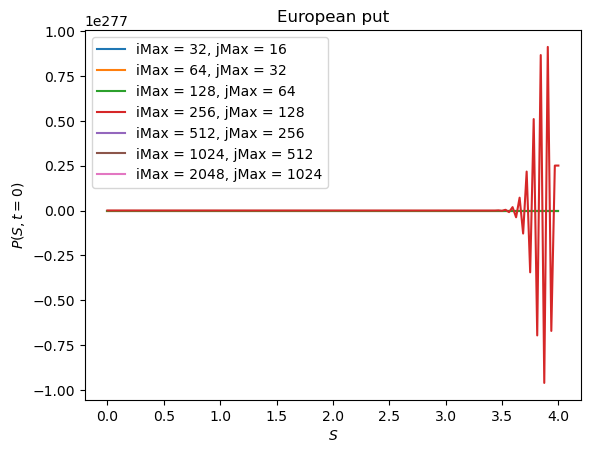

In [7]:
# We'll crank up the number of time steps and space steps, plotting the results.
N = [int(pow(2,j)) for j in range(4,11)]
for j in range(len(N)):
    iMax = 2 * N[j]
    jMax = N[j]
    S, V = EuroPutFD( iMax, jMax, X, T, r, sigma, delta )
    plt.plot( S, V, label=f'iMax = {iMax}, jMax = {jMax}' )

plt.plot( [X, X], [0, X], linestyle="dotted" )
plt.xlabel( "$S$" )
plt.ylabel( "$P(S, t=0)$" )
plt.title( "European put" )
plt.legend()

# Stability and Convergence of the Scheme

 You will see that it is possible to think of the explicit finite
difference scheme as a trinomial tree and $A$, $B$ and $C$ as
probabilities.
  First note that $A + B + C = 1$, second consider what the
expected value of $S$ is at time $i\Delta t$:
$$E[S_j^i]=\frac{1}{1+r\Delta t}(A(S_j^i+\Delta S))+B(S_j^i)+C(S_j^i-\Delta S))$$
$$=\frac{1}{1+r\Delta t}(S_j^i(1+(r-\delta)\Delta t))$$
$$=\frac{1}{1+r\Delta t}E[S_j^{i+1}]$$
the expected future value of $S$, following GBM, under the risk-neutral
probability discounted at the risk-free
rate. So $A$, $B$ and $C$ can also be interpreted as risk-neutral
probabilities (you can also check that the variance works).

 Unfortunately, the explicit finite difference scheme is
occasionally unstable, in that for particular choices of $\Delta t$ and 
$\Delta S$, the scheme will not give an option value even close to the
correct answer as small errors magnify during the iterative
procedure.
  There is a mathematical method that can be used to determine
what the constraint is, however, we can also appeal to our
probabilistic explanation to see what the constraint is for the
explicit finite difference method.

# Tasks

- What can we say about $A$, $B$ and $C$ if we know they are probabilities? Derive and test the stability condition
$$
\Delta t<\frac{1}{\sigma^2 j^2}.
$$


The condition above ensures that $B > 0$.

# Efficiency

Choosing the values of $\Delta t$ and $\Delta S$ will affect the efficiency of your scheme. The stability often severely restricts choice of $\Delta t$, $\Delta S$:
- $\Delta t$ cannot be too small, or else computation will take too long
- then this puts lower bound on size of $\Delta S$
Nonetheless, we have some flexibility. Two common choices:
- choose $\Delta t$, $\Delta S$ so that $B = 2/3$
(means $A,C$ approx. $1/6$)
- choose $\Delta t$, $\Delta S$  so that $B = 1/3$
(means A,C approx. 1/3)

# Tasks

- derive the truncation errors of the scheme
- by choosing different values of $\Delta t$ and $\Delta S$, verify the convergence rate of the method
- analyse the errors, comparing with the analytic solution 
- try interpolation techniques to get the values inbetween the grid points.
- use `numba` to speed up your code

#### Analytic solution
For a European put we have:
$$
    P(S,t) = X e^{-r(T-t)} N(-d_2) - SN(-d_1)
$$
where $N$ is the cumulative distribution function of the standard normal,
$$
    N(x) = \frac{1}{\sqrt{2\pi}} \, \int_{-\infty}^x e^{-s^2/2} \, ds,
$$
and the $d_j$ are given by
$$
\begin{align}
    d_1 &= \frac{\log(S/X) + (r + \sigma^2/2)(T-t)}{\sigma \sqrt{T-t}} \\
    d_2 &= \frac{\log(S/X) + (r - \sigma^2/2)(T-t)}{\sigma \sqrt{T-t}}
\end{align}
$$

In [8]:
from scipy.stats import norm

# Compute the exact solution
def EuroPut_exact( S, t, X, T, r, sigma ):
    if S == 0:
        val = X * exp( -r*(T - t) )
    else: # S > 0
        d1 = log(S/X) + (r + 0.5*sigma*sigma)*(T - t)
        d1 *= 1.0 /(sigma * sqrt(T - t))
        
        d2 = log(S/X) + (r - 0.5*sigma*sigma)*(T - t)
        d2 *= 1.0 /(sigma * sqrt(T - t))
    
        val = X * exp( -r*(T - t) ) * norm.cdf(-d2) - S * norm.cdf(-d1)
        
    return val

In [9]:
# Set up a problem
X = 100.0
T = 1.0
r = 0.06
sigma = 0.2
delta = 0.0

If we want to arrange that the largest value of $B$ is, say, $\theta \in (0,1)$ then we need
$$
    \theta = 1 - \sigma^2 J^2 \frac{T}{I}
    \qquad \mbox{or} \qquad
    \frac{J^2}{I} = \frac{1 - \theta}{\sigma^2 T},
$$
where $I =$ `iMax` and $J =$ `jMax`. We can rearrange this to get a formula for $I$ in terms of $J$:
$$
I = \left(\frac{\sigma^2 T}{1 - \theta}\right) J^2.
$$

In [10]:
# Choose iMax and jMax so that the maximum value of B is around 1/3.
from math import ceil

theta = 1.0/3.0
stabilityRatio = (sigma*sigma*T)/(1.0 - theta)

# Set jMax, then use it to compute iMax
jMax = 128
iMax = int(ceil(jMax*jMax*stabilityRatio))
(iMax, jMax)

(984, 128)

In [11]:
# Solve with finite differences, then plot that and the true solution
delta = 0.0
S, fdV = EuroPutFD( iMax, jMax, X, T, r, sigma, delta )
trueV = np.array( [EuroPut_exact(s, 0.0, X, T, r, sigma ) for s in S] )

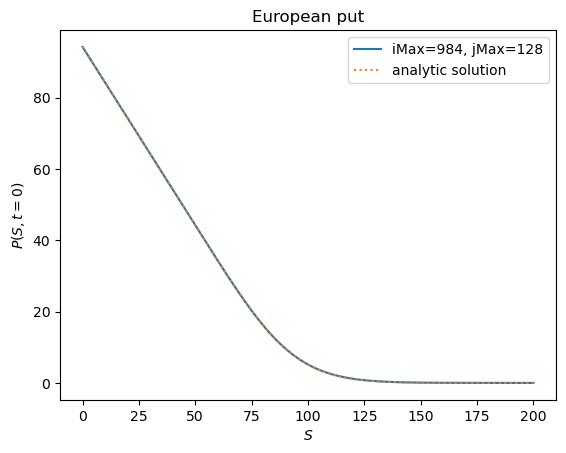

In [12]:
plt.plot( S, fdV, label=f'iMax={iMax}, jMax={jMax}' )
plt.plot( S, trueV, linestyle="dotted", label='analytic solution' )
plt.xlabel( '$S$' ) 
plt.ylabel( '$P(S, t=0)$' ) 
plt.title( "European put" )
plt.legend()

The agreement between the two curves is so good that one can't really see any differences in this plot.

### Investigating convergence
Here we try a range of steps sizes in $t$ and $S$ and see how the error decreases. We'll measure error with a discrete approximation to
$$
   D = \left[ \frac{1}{S_u} \,\int_0^{S_u} \left( P(S,0) - P_{FD}(S,0) \right)^2 \, dS \right]^{1/2}
$$
where $P(S,0)$ is the analytic solution and $P_{FD}(S,0)$ is the finite-difference approximation.

In [13]:
# Define a function to compute our measure of error
def rmsError( fdV, trueV ):
    err = fdV - trueV
    return( sqrt(np.mean(err*err)) )

# Apply it to a range of sizes
jMaxVals = np.array( [int(pow(2,j)) for j in range(4,11)], dtype=np.uint )
numJVals = len(jMaxVals)
iMaxVals = np.zeros(numJVals, dtype=np.uint)
rmsErrorVals = np.zeros(numJVals)
for i in range(numJVals):
    jMax = jMaxVals[i]
    iMax = int(ceil(jMax*jMax*stabilityRatio))
    iMaxVals[i] = iMax
    S, fdV = EuroPutFD( iMax, jMax, X, T, r, sigma, delta )
    trueV = np.array( [EuroPut_exact(s, 0.0, X, T, r, sigma ) for s in S] )
    rmsErrorVals[i] = rmsError( fdV, trueV )
    print( f'iMax = {iMax}, jMax = {jMax}, D = {rmsErrorVals[i]}' ) 

iMax = 16, jMax = 16, D = 0.13071098038352705
iMax = 62, jMax = 32, D = 0.03242845209953716
iMax = 246, jMax = 64, D = 0.008127482967296694
iMax = 984, jMax = 128, D = 0.002040461763007803
iMax = 3933, jMax = 256, D = 0.0005208014877076591
iMax = 15729, jMax = 512, D = 0.0001619355985894163
iMax = 62915, jMax = 1024, D = 0.00010208579821180843


#### Convergence in $\Delta S$
Here we'll hold `iMax` at a large value (so that $\Delta t$ is very small) and examine the error as a function of $\Delta S$. One expects quadratic convergence, which means that
$$
    D = G \Delta S^2 + \mbox{higher order terms}
$$
for some constant $G$. Thus if we repeatedly double the number of steps `jMax`, (and thus reduce $\Delta S$ by a factor of two), we expect $D$ to decrease by a factor of around 4.

In [14]:
iMax = iMaxVals[numJVals-1]
dsVals = np.zeros(numJVals)
for i in range(numJVals):
    jMax = jMaxVals[i]
    S, fdV = EuroPutFD( iMax, jMax, X, T, r, sigma, delta )
    trueV = np.array( [EuroPut_exact(s, 0.0, X, T, r, sigma ) for s in S] )
    rmsErrorVals[i] = rmsError( fdV, trueV )
    dsVals[i] = S[1] - S[0]
    if i > 0:
        errRatio = rmsErrorVals[i-1] / rmsErrorVals[i]
        print( f'dS = {dsVals[i]}, D[{i}] = {rmsErrorVals[i]}, D[{i-1}]/D[{i}] = {errRatio}' ) 
    else:
        print( f'dS = {dsVals[i]}, D[{i}] = {rmsErrorVals[i]}' ) 

dS = 12.5, D[0] = 0.1443413090911362
dS = 6.25, D[1] = 0.0356786843491803, D[0]/D[1] = 4.045589452752687
dS = 3.125, D[2] = 0.00893385506397742, D[1]/D[2] = 3.993649336560412
dS = 1.5625, D[3] = 0.0022393286034633427, D[2]/D[3] = 3.9895239359513077
dS = 0.78125, D[4] = 0.0005674758946614299, D[3]/D[4] = 3.946121103169292
dS = 0.390625, D[5] = 0.00016959112622463773, D[4]/D[5] = 3.3461414361371733
dS = 0.1953125, D[6] = 0.00010208579821180843, D[5]/D[6] = 1.6612607159398285


The expected behaviour appears for all but the smallest values of $\Delta S$.

#### Convergence in $\Delta t$
The relationship between `iMax` and `jMax` imposed by stability considerations means that it's harder to do a straightforward experiment about the dependence of $D$ on $\Delta t$.

Our stability relation
$$
    I = \left(\frac{\sigma^2 T}{1 - \theta}\right) J^2
$$
can be rewritten in terms of $\Delta S = S_u/J$ and $\Delta t = T / I$ so that it becomes
$$
    \frac{T}{\Delta t} = \left(\frac{\sigma^2 T}{1 - \theta}\right) \left( \frac{S_u}{\Delta S}\right)^2
    \qquad \mbox{or} \qquad
    \Delta t = \left( \frac{T}{S_u^2} \right) \left(\frac{1 - \theta}{\sigma^2 T}\right)\Delta S^2
$$
This means that if $\Delta S$ decreases by a factor of 2, then $\Delta t$ decreases by a factor of 4.  The analysis with Taylor series above suggests that,
$$
    D = G \Delta S^2 + H \Delta t + \mbox{higher order terms},
$$
for some constants $G$ and $H$ and so if we reduce $\Delta S$ as in the previous numerical experiment (by factors of 2 ) and compute $\Delta t$ in a way consistent with stability, we expect to see the errors decline by a factor of 4.

In [15]:
rmsErrorVals = np.zeros(numJVals)
for i in range(numJVals):
    jMax = jMaxVals[i]
    iMax = int(ceil(jMax*jMax*stabilityRatio))
    S, fdV = EuroPutFD( iMax, jMax, X, T, r, sigma, delta )
    trueV = np.array( [EuroPut_exact(s, 0.0, X, T, r, sigma ) for s in S] )

    dS = S[1] -  S[0]
    dt = T / iMax
    rmsErrorVals[i] = rmsError( fdV, trueV )
    if i > 0 :
        errRatio = rmsErrorVals[i-1] / rmsErrorVals[i]
        print( f'dS = {dS}, dt = {dt}, D[{i}] = {rmsErrorVals[i]}, D[{i-1}]/D[{i}] = {errRatio}' ) 
    else:
        print( f'dS = {dS}, dt = {dt}, D[{i}] = {rmsErrorVals[i]}' ) 

dS = 12.5, dt = 0.0625, D[0] = 0.13071098038352705
dS = 6.25, dt = 0.016129032258064516, D[1] = 0.03242845209953716, D[0]/D[1] = 4.0307499100579225
dS = 3.125, dt = 0.0040650406504065045, D[2] = 0.008127482967296694, D[1]/D[2] = 3.9899747843240676
dS = 1.5625, dt = 0.0010162601626016261, D[3] = 0.002040461763007803, D[2]/D[3] = 3.9831586725330923
dS = 0.78125, dt = 0.0002542588354945334, D[4] = 0.0005208014877076591, D[3]/D[4] = 3.9179261410888544
dS = 0.390625, dt = 6.357683260219975e-05, D[5] = 0.0001619355985894163, D[4]/D[5] = 3.216102526215612
dS = 0.1953125, dt = 1.5894460780418023e-05, D[6] = 0.00010208579821180843, D[5]/D[6] = 1.5862696028827734


The expected relationship holds up until we get to the very smallest step sizes.

#### Dependence on $S_u$
If we try to get more accuracy by increasing `jMax` and `iMax` in the numerical experiments above, the answers don't really improve much. I think this is an influence of the imperfect upper boundary condition (as we can't really send $S$ to infinity) and so one might expect to be able to get lower values of $D$ by using a larger a larger value of $S_u$. 

In [16]:
jMaxVals = np.array( [int(pow(2,j)) for j in range(5,14)], dtype=np.uint )
numJVals = len(jMaxVals)

rmsErrorVals = np.zeros(numJVals)
for i in range(numJVals):
    jMax = jMaxVals[i]
    iMax = int(ceil(jMax*jMax*stabilityRatio))
    S, fdV = EuroPutFD( iMax, jMax, X, T, r, sigma, delta, SuFactor = 4.0 ) # S_u = SuFactor * X
    trueV = np.array( [EuroPut_exact(s, 0.0, X, T, r, sigma ) for s in S] )

    dS = S[1] -  S[0]
    dt = T / iMax
    rmsErrorVals[i] = rmsError( fdV, trueV )
    if i > 0 :
        errRatio = rmsErrorVals[i-1] / rmsErrorVals[i]
        print( f'dS = {dS}, dt = {dt}, D[{i}] = {rmsErrorVals[i]}, D[{i-1}]/D[{i}] = {errRatio}' ) 
    else:
        print( f'dS = {dS}, dt = {dt}, D[{i}] = {rmsErrorVals[i]}' ) 

dS = 12.5, dt = 0.016129032258064516, D[0] = 0.10094385227469042
dS = 6.25, dt = 0.0040650406504065045, D[1] = 0.024800380930649454, D[0]/D[1] = 4.070254104441572
dS = 3.125, dt = 0.0010162601626016261, D[2] = 0.006189090313015415, D[1]/D[2] = 4.007112463441553
dS = 1.5625, dt = 0.0002542588354945334, D[3] = 0.0015481142769550955, D[2]/D[3] = 3.9978252285021303
dS = 0.78125, dt = 6.357683260219975e-05, D[4] = 0.00038727100596361785, D[3]/D[4] = 3.997495947580783
dS = 0.390625, dt = 1.5894460780418023e-05, D[5] = 9.685664912022778e-05, D[4]/D[5] = 3.998393600039785
dS = 0.1953125, dt = 3.973630984784967e-06, D[6] = 2.4219532368794752e-05, D[5]/D[6] = 3.999113097865634
dS = 0.09765625, dt = 9.934107067819156e-07, D[7] = 6.055511025817835e-06, D[6]/D[7] = 3.9995852151096942
dS = 0.048828125, dt = 2.483526766954789e-07, D[8] = 1.5136766928072204e-06, D[7]/D[8] = 4.000531325211504


This experiment supports the view that a larger valueof $S_u$ permits greater accuracy.

#### Interpolation

Left as an exercise for the reader: see the documentation for NumPy's [`interp()`](https://numpy.org/doc/stable/reference/generated/numpy.interp.html)for linear interpolation or, for cubic splines (useful if you want to try Richardson extrapolation later in the term), see SciPy's [`CubicSpline()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html)